# Machine Learning Models for Multi-Signal Stress Classification

This notebook uses extracted multi-signal features (EDA, HR, TEMP, ACC) to train Logistic Regression and Random Forest models for stress detection. Model performance is evaluated using accuracy and confusion matrix.

In [24]:
## Import libraries we need

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# evaluation tools
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [25]:
## Load the features file created in 03_features.ipynb

subject = "S01"   # change if you are using another subject

# this is the file name created by our multi-signal feature notebook
file_name = f"features_multisignal_{subject}.csv"

df = pd.read_csv(file_name)

print("Loaded file:", file_name)
print("Total rows (windows):", len(df))

df.head()


Loaded file: features_multisignal_S01.csv
Total rows (windows): 147


,subject,window_start,window_end,eda_mean,eda_std,hr_mean,hr_std,temp_mean,temp_std,acc_mean,acc_std,label
0,S01,2013-02-20 17:55:19,2013-02-20 17:55:48.750,0.201066,0.266698,86.724500,9.193781,31.762333,0.828232,65.360075,9.943260,rest
1,S01,2013-02-20 17:55:34,2013-02-20 17:56:03.750,0.271109,0.206442,86.400667,0.944103,32.268333,0.274350,65.579771,9.131499,rest
2,S01,2013-02-20 17:55:49,2013-02-20 17:56:18.750,0.276522,0.088712,87.592333,0.983746,32.564333,0.167165,64.963706,5.817983,rest
3,S01,2013-02-20 17:56:04,2013-02-20 17:56:33.750,0.346803,0.030328,88.883667,0.585141,32.820667,0.139264,64.899532,7.292461,rest
4,S01,2013-02-20 17:56:19,2013-02-20 17:56:48.750,0.383235,0.014667,90.852000,1.972650,32.986000,0.065573,64.817945,5.443674,rest


In [26]:
## Select the input features (numbers) and the output label (stress/rest)

# X = input features for the model
X = df[[
    "eda_mean", "eda_std",
    "hr_mean", "hr_std",
    "temp_mean", "temp_std",
    "acc_mean", "acc_std"
]]

# y = the label we want to predict
y = df["label"]

print("X shape:", X.shape)
print("Label counts:")
print(y.value_counts())


X shape: (147, 8)
Label counts:
label
rest      110
stress     37
Name: count, dtype: int64


In [27]:
## Convert text labels (rest/stress) into numbers (0/1)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Classes order:", le.classes_)  # example: ['rest' 'stress']


Classes order: ['rest' 'stress']


In [28]:
## Split data into train and test sets
## Train = model learns from this
## Test = model is checked on unseen data

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,       # 20% test, 80% train
    random_state=42,     # same results every time
    stratify=y_encoded   # keeps rest/stress ratio similar in train and test
)

print("Train samples:", len(X_train))
print("Test samples:", len(X_test))


Train samples: 117
Test samples: 30


In [29]:
## Train Logistic Regression model (simple baseline model)

lr = LogisticRegression(max_iter=1000)  # max_iter helps model converge

lr.fit(X_train, y_train)               # train model
y_pred_lr = lr.predict(X_test)         # predict test labels

print("Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_lr), 3))
print("Classification Report (Logistic):")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))


Logistic Regression Accuracy: 0.767
Classification Report (Logistic):
              precision    recall  f1-score   support

        rest       0.76      1.00      0.86        22
      stress       1.00      0.12      0.22         8

    accuracy                           0.77        30
   macro avg       0.88      0.56      0.54        30
weighted avg       0.82      0.77      0.69        30



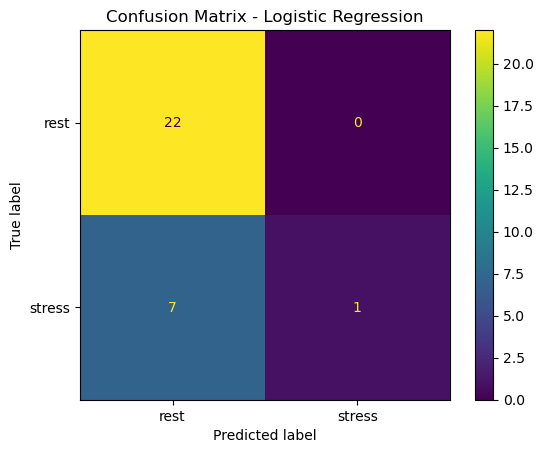

In [30]:
## Confusion Matrix for Logistic Regression
## It shows correct vs wrong predictions

cm_lr = confusion_matrix(y_test, y_pred_lr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=le.classes_)
disp.plot()

plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [31]:
## Train Random Forest model (more powerful model)

rf = RandomForestClassifier(
    n_estimators=200,    # number of trees
    random_state=42
)

rf.fit(X_train, y_train)               # train model
y_pred_rf = rf.predict(X_test)         # predict test labels

print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


Random Forest Accuracy: 0.8
Classification Report (Random Forest):
              precision    recall  f1-score   support

        rest       0.83      0.91      0.87        22
      stress       0.67      0.50      0.57         8

    accuracy                           0.80        30
   macro avg       0.75      0.70      0.72        30
weighted avg       0.79      0.80      0.79        30



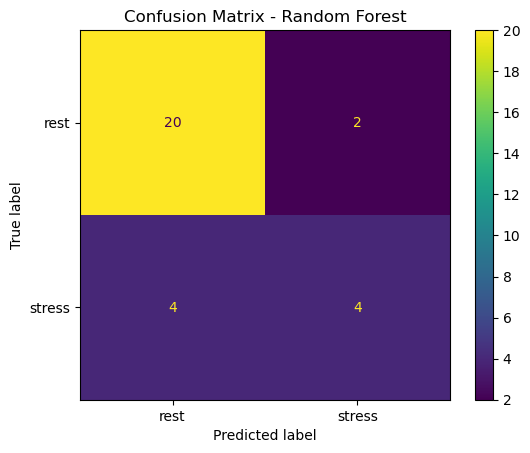

In [32]:
## Confusion Matrix for Random Forest

cm_rf = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le.classes_)
disp.plot()

plt.title("Confusion Matrix - Random Forest")
plt.show()


In [33]:
## Final simple comparison of both models

acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Final Results")
print("Logistic Regression Accuracy:", round(acc_lr, 3))
print("Random Forest Accuracy:", round(acc_rf, 3))


Final Results
Logistic Regression Accuracy: 0.767
Random Forest Accuracy: 0.8
